In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 99

In [126]:
auto = pd.read_csv("data/imports-85.data", header = None)

In [127]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
        'highway-mpg', 'price']

In [128]:
auto.columns = cols

In [129]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Handle missing values

In [130]:
numeric_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
               'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [131]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

* Primary exploration shows that there are no null values. But, in column `normalized-losses` null values are marked as `?`

In [132]:
(auto == '?').sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [133]:
auto[numeric_col] = auto[numeric_col].replace('?', np.nan)
auto[numeric_col] = auto[numeric_col].astype('float')

In [134]:
(auto == '?').sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [135]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* Our target is `price`, we will drop record which does not have price values

In [136]:
auto.dropna(subset=['price'], axis = 0, inplace=True)

In [137]:
auto.shape

(201, 26)

In [138]:
y = auto['price'].copy()

In [139]:
X = auto.drop('price', axis=1).copy()

In [144]:
numeric_col.remove('price')

In [145]:
from sklearn.impute import SimpleImputer

In [146]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [147]:
X[numeric_col] = imputer.fit_transform(X[numeric_col])

In [148]:
X.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

### Normalize data

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler = MinMaxScaler()

In [151]:
X[numeric_col] = scaler.fit_transform(X[numeric_col])

In [152]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0.298429,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,0.413433,0.324786,0.083333,0.411171,dohc,four,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,3,0.298429,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,0.413433,0.324786,0.083333,0.411171,dohc,four,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,1,0.298429,alfa-romero,gas,std,two,hatchback,rwd,front,0.230321,0.449254,0.444444,0.383333,0.517843,ohcv,six,0.343396,mpfi,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,2,0.518325,audi,gas,std,four,sedan,fwd,front,0.384840,0.529851,0.504274,0.541667,0.329325,ohc,four,0.181132,mpfi,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,2,0.518325,audi,gas,std,four,sedan,4wd,front,0.373178,0.529851,0.521368,0.541667,0.518231,ohc,five,0.283019,mpfi,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


### Univariate model

In [153]:
from sklearn.neighbors import KNeighborsRegressor

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def knn_train_test(X, y, feature_col, k):
    X_train, X_test, y_train, y_test = train_test_split(X[[feature_col]], y, test_size = 0.2)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test[[feature_col]])
    return np.sqrt(mean_squared_error(y_test, prediction))

In [173]:
k_rmse_result = {}

In [174]:
for col in numeric_col:
    temp = {}
    for k in [1,3,5,7,9]:
        temp[k] = knn_train_test(X, y, col, k)
    k_rmse_result[col] = temp

In [175]:
k_rmse_result

{'normalized-losses': {1: 7337.941217880747,
  3: 7388.530493885682,
  5: 5841.672333727231,
  7: 6956.809000281753,
  9: 7119.752988036836},
 'wheel-base': {1: 3265.1556157589107,
  3: 4325.004394314543,
  5: 4091.149040693914,
  7: 5401.980481632848,
  9: 6621.684828757267},
 'length': {1: 4971.22139872305,
  3: 5364.800324871864,
  5: 4396.05822227806,
  7: 4653.850961090589,
  9: 5104.778932501773},
 'width': {1: 3387.581888129125,
  3: 4025.843889046145,
  5: 3516.3321737426286,
  7: 4860.184063378194,
  9: 5457.317069587642},
 'height': {1: 7232.498925497126,
  3: 10180.617770001081,
  5: 4998.612938044937,
  7: 6799.445623977706,
  9: 8461.983489823979},
 'curb-weight': {1: 4894.145459678105,
  3: 4045.6892408592553,
  5: 3136.482898049358,
  7: 5944.568488685698,
  9: 5544.565481894606},
 'engine-size': {1: 3359.180068365987,
  3: 3851.7356398154316,
  5: 1985.4302031819996,
  7: 3496.9450964329426,
  9: 3865.4804483215953},
 'bore': {1: 8669.432012227453,
  3: 6283.18694078023

Text(0, 0.5, 'RMSE')

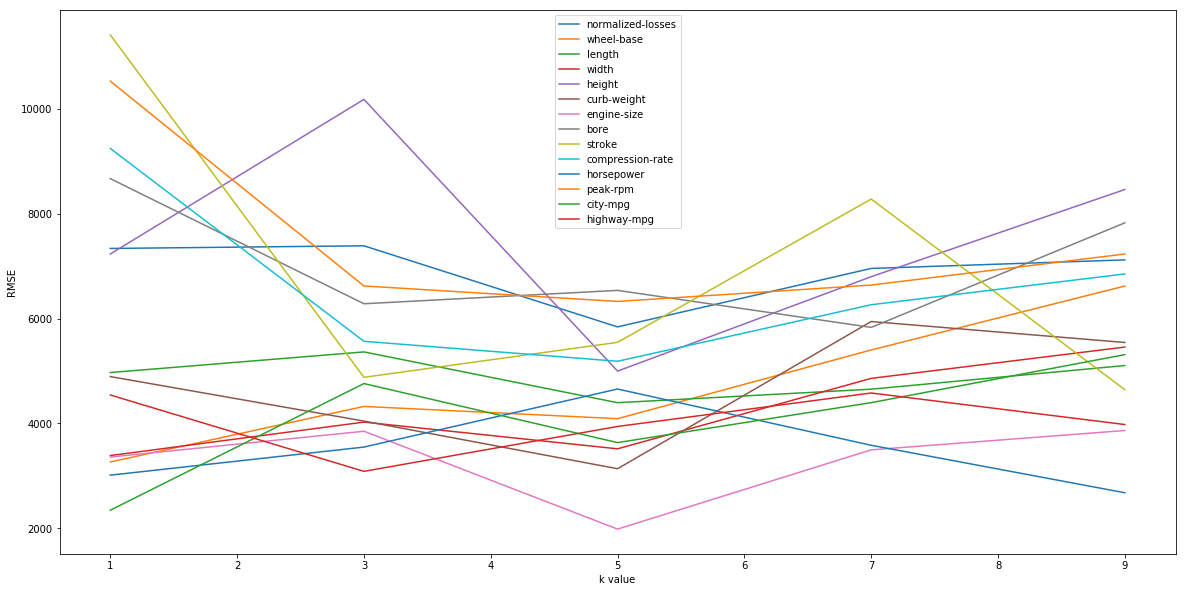

In [182]:
fig = plt.figure(figsize=(20,10))
for k, v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=k)
plt.legend()
plt.xlabel('k value')
plt.ylabel('RMSE')